In [3]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.9 MB 9.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.6 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 18.3 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 13.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 74.3 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 68.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 67.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 265 kB 36.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
for dirname, _, filenames in os.walk('/Users/nam/Downloads/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/nam/Downloads/archive/btc_1h_data_2018_to_2024-09-06.csv
/Users/nam/Downloads/archive/btc_4h_data_2018_to_2024-09-06.csv
/Users/nam/Downloads/archive/btc_15m_data_2018_to_2024-09-09.csv
/Users/nam/Downloads/archive/btc_1d_data_2018_to_2024-09-06.csv


In [21]:
import pandas as pd

# File paths
file_15m = '/Users/nam/Downloads/archive/btc_15m_data_2018_to_2024-09-09.csv'
file_1h = '/Users/nam/Downloads/archive/btc_1h_data_2018_to_2024-09-06.csv'
file_4h = '/Users/nam/Downloads/archive/btc_4h_data_2018_to_2024-09-06.csv'
file_1d = '/Users/nam/Downloads/archive/btc_1d_data_2018_to_2024-09-06.csv'

# Load datasets
df_15m = pd.read_csv(file_15m)
df_1h = pd.read_csv(file_1h)
df_4h = pd.read_csv(file_4h)
df_1d = pd.read_csv(file_1d)

df_15m['Open time'] = pd.to_datetime(df_15m['Open time'])
df_1h['Open time'] = pd.to_datetime(df_1h['Open time'])
df_4h['Open time'] = pd.to_datetime(df_4h['Open time'])
df_1d['Open time'] = pd.to_datetime(df_1d['Open time'])

# Merge the datasets on 'Open time' (start with the most granular 15m data)
merged_df = df_15m.merge(df_1h, on='Open time', how='outer', suffixes=('_15m', '_1h'))\
                  .merge(df_4h, on='Open time', how='outer', suffixes=('', '_4h'))\
                  .merge(df_1d, on='Open time', how='outer', suffixes=('', '_1d'))

# Check the structure of the merged dataset
merged_df.info()

# Preview the merged data
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234027 entries, 0 to 234026
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Open time                         234027 non-null  datetime64[ns]
 1   Open_15m                          234001 non-null  float64       
 2   High_15m                          234001 non-null  float64       
 3   Low_15m                           234001 non-null  float64       
 4   Close_15m                         234001 non-null  float64       
 5   Volume_15m                        234001 non-null  float64       
 6   Close time_15m                    234001 non-null  object        
 7   Quote asset volume_15m            234001 non-null  float64       
 8   Number of trades_15m              234001 non-null  float64       
 9   Taker buy base asset volume_15m   234001 non-null  float64       
 10  Taker buy quote asset volume_15m

,Open time,Open_15m,High_15m,Low_15m,Close_15m,Volume_15m,Close time_15m,Quote asset volume_15m,Number of trades_15m,Taker buy base asset volume_15m,...,High_1d,Low_1d,Close_1d,Volume_1d,Close time_1d,Quote asset volume_1d,Number of trades_1d,Taker buy base asset volume_1d,Taker buy quote asset volume_1d,Ignore_1d
0,2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572.0,63.227133,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0
1,2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461.0,47.686389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000.0,43.710406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195.0,73.897993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898.0,34.257652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Open time                                0
Open_15m                                26
High_15m                                26
Low_15m                                 26
Close_15m                               26
Volume_15m                              26
Close time_15m                          26
Quote asset volume_15m                  26
Number of trades_15m                    26
Taker buy base asset volume_15m         26
Taker buy quote asset volume_15m        26
Ignore_15m                              26
Open_1h                             175573
High_1h                             175573
Low_1h                              175573
Close_1h                            175573
Volume_1h                           175573
Close time_1h                       175573
Quote asset volume_1h               175573
Number of trades_1h                 175573
Taker buy base asset volume_1h      175573
Taker buy quote asset volume_1h     175573
Ignore_1h                 

In [27]:
# Handle missing values (e.g., forward fill)
merged_df_cleaned = merged_df.fillna(method='ffill')  # Forward fill missing values
merged_df_cleaned = merged_df_cleaned.fillna(method='bfill')  # Backward fill if neede

/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/ipykernel_8673/2770867180.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_cleaned = merged_df.fillna(method='ffill')  # Forward fill missing values
/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/ipykernel_8673/2770867180.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df_cleaned = merged_df_cleaned.fillna(method='bfill')  # Backward fill if neede


In [28]:
# Verify no missing values remain
print("Missing values after filling:\n", merged_df_cleaned.isnull().sum())

Missing values after filling:
 Open time                           0
Open_15m                            0
High_15m                            0
Low_15m                             0
Close_15m                           0
Volume_15m                          0
Close time_15m                      0
Quote asset volume_15m              0
Number of trades_15m                0
Taker buy base asset volume_15m     0
Taker buy quote asset volume_15m    0
Ignore_15m                          0
Open_1h                             0
High_1h                             0
Low_1h                              0
Close_1h                            0
Volume_1h                           0
Close time_1h                       0
Quote asset volume_1h               0
Number of trades_1h                 0
Taker buy base asset volume_1h      0
Taker buy quote asset volume_1h     0
Ignore_1h                           0
Open                                0
High                                0
Low                

In [29]:
# Check for duplicates
duplicate_rows = merged_df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [30]:
# Remove duplicates
merged_df_cleaned = merged_df_cleaned.drop_duplicates()

In [31]:
# Ensure data types are correct
print("\nData types after cleaning:\n", merged_df_cleaned.dtypes)


Data types after cleaning:
 Open time                           datetime64[ns]
Open_15m                                   float64
High_15m                                   float64
Low_15m                                    float64
Close_15m                                  float64
Volume_15m                                 float64
Close time_15m                              object
Quote asset volume_15m                     float64
Number of trades_15m                       float64
Taker buy base asset volume_15m            float64
Taker buy quote asset volume_15m           float64
Ignore_15m                                 float64
Open_1h                                    float64
High_1h                                    float64
Low_1h                                     float64
Close_1h                                   float64
Volume_1h                                  float64
Close time_1h                               object
Quote asset volume_1h                      float64
Nu

In [32]:
merged_df_cleaned.head()

,Open time,Open_15m,High_15m,Low_15m,Close_15m,Volume_15m,Close time_15m,Quote asset volume_15m,Number of trades_15m,Taker buy base asset volume_15m,...,High_1d,Low_1d,Close_1d,Volume_1d,Close time_1d,Quote asset volume_1d,Number of trades_1d,Taker buy base asset volume_1d,Taker buy quote asset volume_1d,Ignore_1d
0,2018-01-01 00:00:00,13715.65,13715.65,13400.01,13556.15,123.616013,2018-01-01 00:14:59.999,1.675545e+06,1572.0,63.227133,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0
1,2018-01-01 00:15:00,13533.75,13550.87,13402.00,13521.12,98.136430,2018-01-01 00:29:59.999,1.321757e+06,1461.0,47.686389,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0
2,2018-01-01 00:30:00,13500.00,13545.37,13450.00,13470.41,79.904037,2018-01-01 00:44:59.999,1.078825e+06,1000.0,43.710406,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0
3,2018-01-01 00:45:00,13494.65,13690.87,13450.00,13529.01,141.699719,2018-01-01 00:59:59.999,1.917783e+06,1195.0,73.897993,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0
4,2018-01-01 01:00:00,13528.99,13571.74,13402.28,13445.63,72.537533,2018-01-01 01:14:59.999,9.778198e+05,898.0,34.257652,...,13818.55,12750.0,13380.0,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595.0,3961.938946,5.280975e+07,0.0


In [34]:
pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 75 kB 3.4 MB/s  eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.5 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 39.4 MB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 12.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
# Load and clean the data
df = merged_df_cleaned.copy()

In [41]:
# Convert 'Open time' to datetime
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

In [42]:
# Set 'Open time' as the index
df.set_index('Open time', inplace=True)

In [43]:
# Ensure all numeric columns are of type float
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].astype(float)

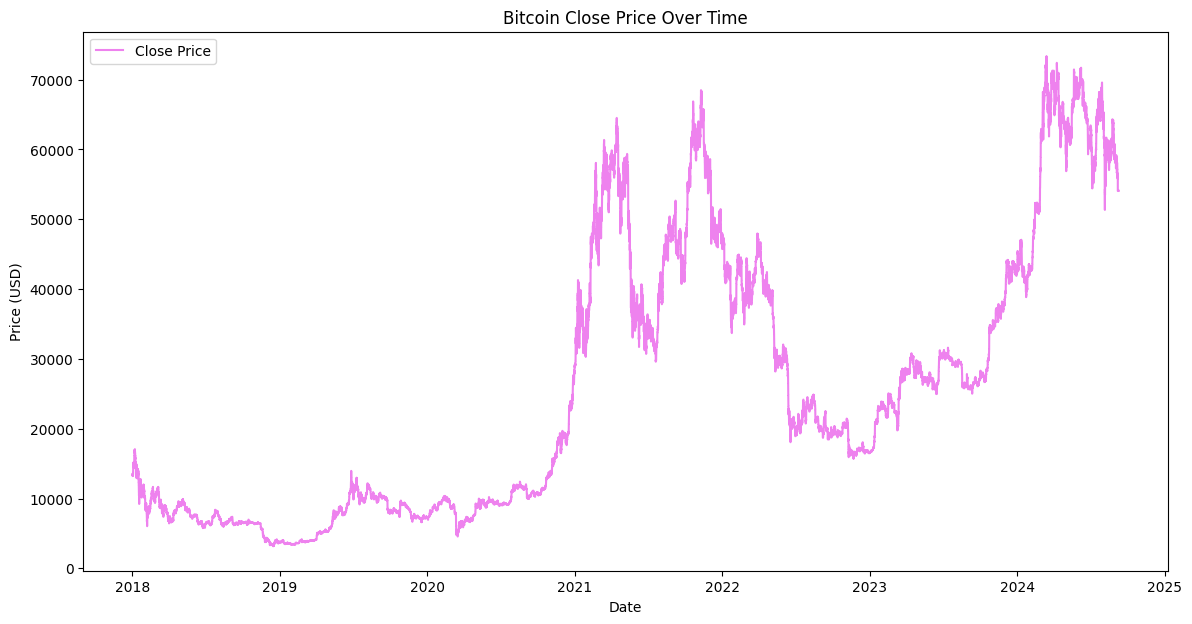

In [44]:
## 1. Visualizing Close Prices Over Time

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='violet')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

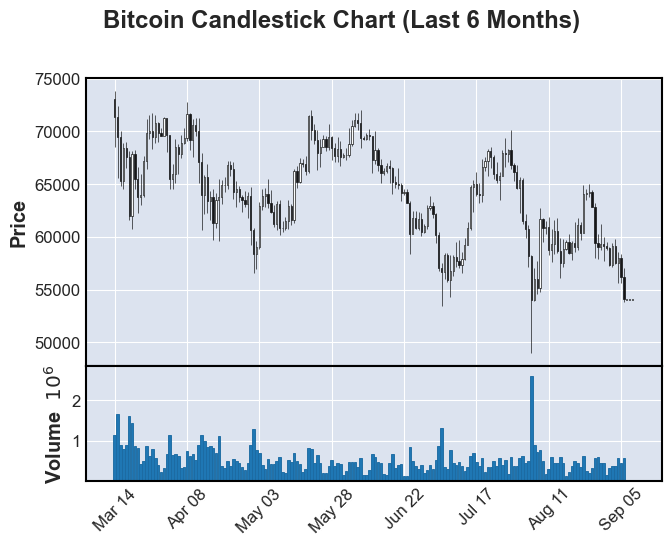

In [52]:
## 2. Candlestick Chart (Using mplfinance)

# Resample data to daily intervals for clarity
df_daily = df.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Plot candlestick chart
mpf.plot(df_daily[-180:], type='candle', volume=True, title='Bitcoin Candlestick Chart (Last 6 Months)')


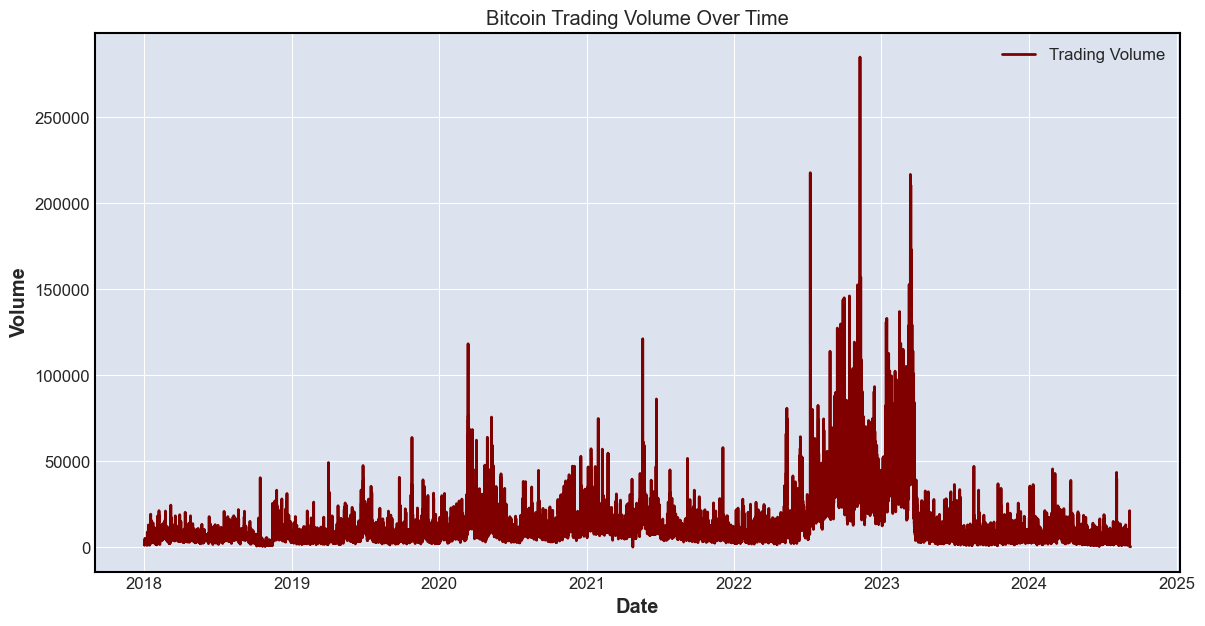

In [57]:
## 3. Analyzing Trading Volume

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='maroon')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


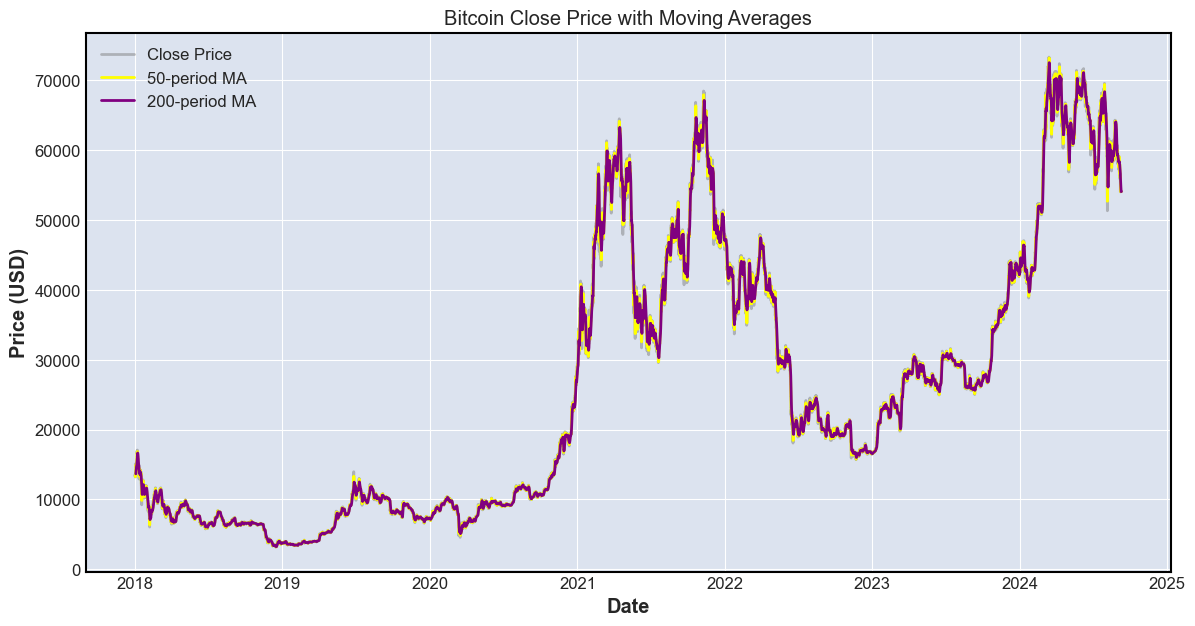

In [58]:
## 4. Moving Averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5, color='grey')
plt.plot(df.index, df['MA50'], label='50-period MA', color='yellow')
plt.plot(df.index, df['MA200'], label='200-period MA', color='purple')
plt.title('Bitcoin Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

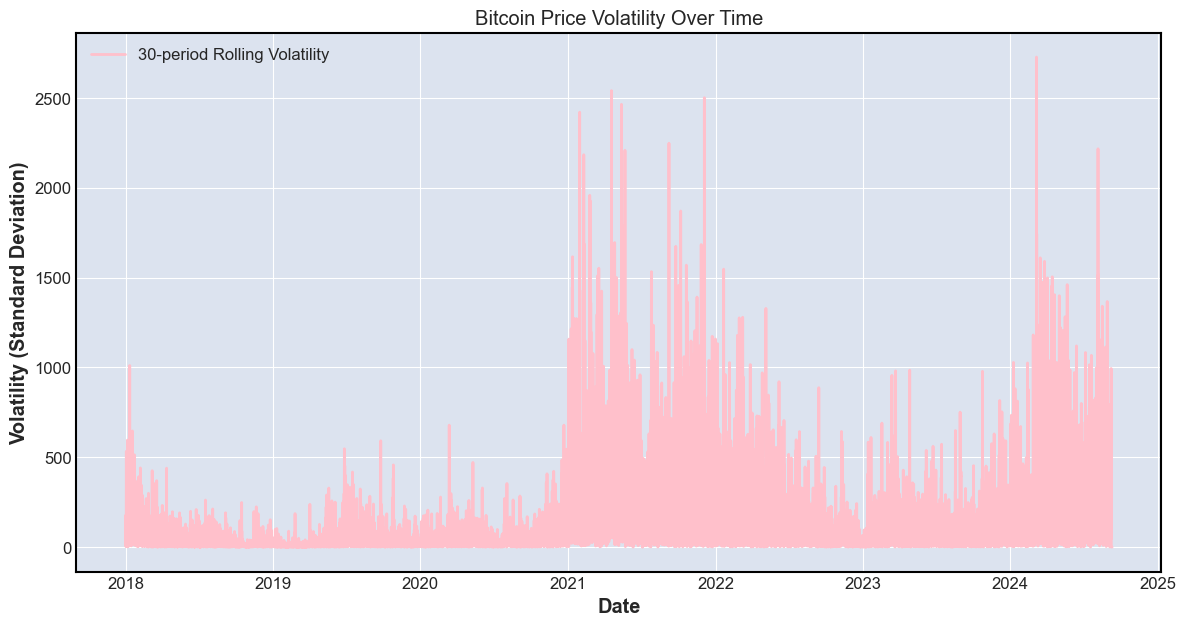

In [59]:
## 5. Volatility Analysis

df['Volatility'] = df['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility'], label='30-period Rolling Volatility', color='pink')
plt.title('Bitcoin Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.show()

In [61]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/pip-install-1ucw4xx1/sklearn_3d4c27131f72472791a5c7a45df6971a/setup.py'"'"'; __file__='"'"'/private/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/pip-install-1ucw4xx1/sklearn_3d4c27131f72472791a5c7a45df6971a/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/pip-pip-egg-info-8mp696ir
         cwd: /private/var/folders/k4/9wp10k_n3kv9mw865twjnp900000gn/T/pip-install-1ucw4xx1/sklea

In [62]:
from sklearn.model_selection import train_test_split

# Assuming 'Close' is the target variable
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.014467818606100616
